In [1]:
# Import & Install Dependencies
# !pip install tensorflow tensorflow-gpu tensorflow-io matplotlib

In [2]:
# Load dependencies!
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio

<div class="alert alert-block alert-info">
Data Loading Function!
</div>

In [3]:
# Defining paths!
Asthma_File = os.path.join('Data','Archive_2','Asthma','103_2b2_Ar_mc_LittC2SE.wav')
Bronchiectasis_File = os.path.join('Data','Archive_2','Bronchiectasis','111_1b2_Tc_sc_Meditron.wav')
Bronchiolitis_File = os.path.join('Data','Archive_2','Bronchiolitis','149_1b1_Al_sc_Meditron.wav')
COPD_File = os.path.join('Data','Archive_2','COPD','104_1b1_Al_sc_Litt3200.wav')
Healthy_File = os.path.join('Data','Archive_2','Healthy','102_1b1_Ar_sc_Meditron.wav')
LRTI_File = os.path.join('Data','Archive_2','LRTI','108_1b1_Al_sc_Meditron.wav')
Pneumonia_File = os.path.join('Data','Archive_2','Pneumonia','122_2b1_Al_mc_LittC2SE.wav')
URTI_File = os.path.join('Data','Archive_2','URTI','101_1b1_Al_sc_Meditron.wav')

In [4]:
def load_wav(filename):
    # Load wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channel)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000Hz - amp of audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

In [5]:
asth_wave = load_wav(Asthma_File)
bronchsis_wave = load_wav(Bronchiectasis_File)
bronchtis_wave = load_wav(Bronchiolitis_File)
COPD_wave = load_wav(COPD_File)
health_wave = load_wav(Healthy_File)
LRTI_wave = load_wav(LRTI_File)
Pneu_wave = load_wav(Pneumonia_File)
URTI_wave = load_wav(URTI_File)

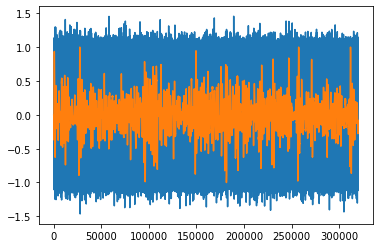

In [6]:
plt.plot(Pneu_wave)
plt.plot(asth_wave)
# plt.plot(bronchsis_wave)
# plt.plot(bronchtis_wave)
# plt.plot(COPD_wave)
# plt.plot(health_wave)
# plt.plot(LRTI_wave)
# plt.plot(URTI_wave)
plt.show()

Wave to Spectrogram!

In [7]:
# Defining paths (again)!
Asthma = os.path.join('Data','Archive_2','Asthma')
Bronchiectasis = os.path.join('Data','Archive_2','Bronchiectasis')
Bronchiolitis = os.path.join('Data','Archive_2','Bronchiolitis')
COPD = os.path.join('Data','Archive_2','COPD')
Healthy = os.path.join('Data','Archive_2','Healthy')
LRTI = os.path.join('Data','Archive_2','LRTI')
Pneumonia = os.path.join('Data','Archive_2','Pneumonia')
URTI = os.path.join('Data','Archive_2','URTI')

In [8]:
# Tensorflow Dataset
# Looks for any wav files in each directory
AsthmaTFDS = tf.data.Dataset.list_files(Asthma+'\*.wav')
BronchiectasisTFDS = tf.data.Dataset.list_files(Bronchiectasis+'\*.wav')
BronchiolitisTFDS = tf.data.Dataset.list_files(Bronchiolitis+'\*.wav')
COPDTFDS = tf.data.Dataset.list_files(COPD+'\*.wav')
HealthyTFDS = tf.data.Dataset.list_files(Healthy+'\*.wav')
LRTITFDS = tf.data.Dataset.list_files(LRTI+'\*.wav')
PneumoniaTFDS = tf.data.Dataset.list_files(Pneumonia+'\*.wav')
URTITFDS = tf.data.Dataset.list_files(URTI+'\*.wav')

In [9]:
# COPDTFDS.as_numpy_iterator().next()

In [10]:
Asthma_Samples = tf.data.Dataset.zip((AsthmaTFDS, tf.data.Dataset.from_tensor_slices(tf.fill(len(AsthmaTFDS), 'Asthma'))))

Bronchiectasis_Samples = tf.data.Dataset.zip((BronchiectasisTFDS, tf.data.Dataset.from_tensor_slices(tf.fill(len(BronchiectasisTFDS), 'Bronchiectasis'))))

Bronchiolitis_Samples = tf.data.Dataset.zip((BronchiolitisTFDS, tf.data.Dataset.from_tensor_slices(tf.fill(len(BronchiolitisTFDS), 'Bronchiolitis'))))

COPD_Samples = tf.data.Dataset.zip((COPDTFDS, tf.data.Dataset.from_tensor_slices(tf.fill(len(COPDTFDS), 'COPD'))))

Healthy_Samples = tf.data.Dataset.zip((HealthyTFDS, tf.data.Dataset.from_tensor_slices(tf.fill(len(HealthyTFDS), 'Healthy'))))

LRTI_Samples = tf.data.Dataset.zip((LRTITFDS, tf.data.Dataset.from_tensor_slices(tf.fill(len(LRTITFDS), 'LRTI'))))

Pneumonia_Samples = tf.data.Dataset.zip((PneumoniaTFDS, tf.data.Dataset.from_tensor_slices(tf.fill(len(PneumoniaTFDS), 'Pneumonia'))))

URTI_Samples = tf.data.Dataset.zip((URTITFDS, tf.data.Dataset.from_tensor_slices(tf.fill(len(URTITFDS), 'URTI'))))

all_data = []
print(len(all_data))
all_data = Asthma_Samples.concatenate(Bronchiectasis_Samples)
print(len(all_data))
all_data = all_data.concatenate(Bronchiolitis_Samples)
print(len(all_data))
all_data = all_data.concatenate(COPD_Samples)
print(len(all_data))
all_data = all_data.concatenate(Healthy_Samples)
print(len(all_data))
all_data = all_data.concatenate(LRTI_Samples)
print(len(all_data))
all_data = all_data.concatenate(Pneumonia_Samples)
print(len(all_data))
all_data = all_data.concatenate(URTI_Samples)
print(len(all_data))

0
34
60
1646
1716
1720
1794
1840


In [11]:
data_iterator = all_data.shuffle(500).as_numpy_iterator()
for item in all_data:
    print(data_iterator.next())

(b'Data\\Archive_2\\COPD\\177_1b2_Pr_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\193_1b2_Pl_mc_AKGC417L_1.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\175_1b1_Al_sc_Litt3200_1.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\141_1b2_Ar_mc_LittC2SE_1.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\213_1p2_Lr_mc_AKGC417L_1.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\185_1b1_Pr_sc_Litt3200_1.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\130_2p5_Tc_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\166_1p1_Al_sc_Meditron_1.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\130_2p5_Tc_mc_AKGC417L_1.wav', b'COPD')
(b'Data\\Archive_2\\Asthma\\103_2b2_Ar_mc_LittC2SE.wav', b'Asthma')
(b'Data\\Archive_2\\COPD\\213_1p2_Ar_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\107_3p2_Pr_mc_AKGC417L_1.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\107_2b3_Pr_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\106_2b1_Pr_mc_LittC2SE_1.wav', b'COPD')
(b'Data\\Archive_2\\COPD\\177_1b4_Tc_mc_AKGC417L.wav', b'COPD')
(b'Data\\Archive_2

Preprocessing and Function Building

In [12]:
# os.listdir(COPD)

In [13]:
def preprocess(file_path, label):
    wav = load_wav(file_path)
    wav = wav[:320000]
    zero_padding = tf.zeros([320000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=256, frame_step=128)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

In [14]:
wav = None
# wav = load_wav(Asthma_File) # 320000
# wav = load_wav(Bronchiectasis_File) # 320000
# wav = load_wav(Bronchiolitis_File) # 320000
# wav = load_wav(COPD_File) # 253696
# wav = load_wav(Healthy_File) # 320000
# wav = load_wav(LRTI_File) # 320000
# wav = load_wav(Pneumonia_File) # 320000
# wav = load_wav(URTI_File) # 320000
wav

In [15]:
filepath, label = Healthy_Samples.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [16]:
spectrogram, label = preprocess(filepath, label)

In [17]:
spectrogram

<tf.Tensor: shape=(2499, 129, 1), dtype=float32, numpy=
array([[[6.0293794e-01],
        [1.0567791e+00],
        [1.0796732e+00],
        ...,
        [1.5809543e-02],
        [9.8446310e-03],
        [3.2346249e-03]],

       [[7.6556463e+00],
        [7.0105953e+00],
        [6.2772150e+00],
        ...,
        [2.8297458e-02],
        [8.4590791e-03],
        [6.0198307e-03]],

       [[8.5992098e+00],
        [8.6196451e+00],
        [6.5668879e+00],
        ...,
        [2.7750337e-03],
        [7.9784878e-03],
        [6.1988831e-05]],

       ...,

       [[9.6097450e+00],
        [3.2518287e+00],
        [9.6631384e+00],
        ...,
        [1.3353698e-02],
        [6.4066313e-03],
        [5.2156448e-03]],

       [[2.8366852e+00],
        [5.7097831e+00],
        [1.1032281e+01],
        ...,
        [1.1853512e-02],
        [1.1511243e-02],
        [2.5640726e-03]],

       [[3.0994155e+00],
        [5.2311058e+00],
        [6.1199007e+00],
        ...,
        [2.8044298

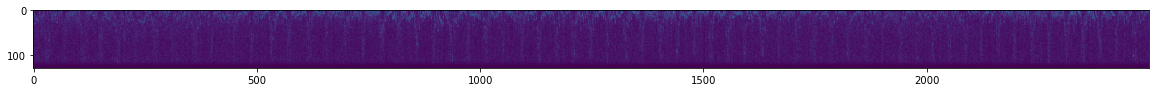

In [18]:
plt.figure(figsize=(20,30))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

Training and Testing Partitions!

In [19]:
# Tensorflow Data Pipeline
all_data = all_data.map(preprocess)
all_data = all_data.cache()
all_data = all_data.shuffle(buffer_size=1000)
all_data = all_data.batch(16)
all_data = all_data.prefetch(8)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [20]:
len(all_data)

115

In [21]:
# Testing and Training Partitions
train = all_data.take(92) #80%
test = all_data.skip(92).take(23) #20%

In [22]:
samples, labels = train.as_numpy_iterator().next()

In [23]:
samples.shape

(16, 2499, 129, 1)

In [24]:
labels

array([b'COPD', b'COPD', b'COPD', b'COPD', b'COPD', b'COPD', b'COPD',
       b'COPD', b'COPD', b'COPD', b'Bronchiolitis', b'COPD',
       b'Bronchiectasis', b'COPD', b'COPD', b'COPD'], dtype=object)

Building the model!!

In [25]:
# Import dependencies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

In [26]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(2499, 129,1)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [27]:
model.compile('Adam', loss='CategoricalCrossentropy', metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 2497, 127, 16)     160       
                                                                 
 conv2d_1 (Conv2D)           (None, 2495, 125, 16)     2320      
                                                                 
 flatten (Flatten)           (None, 4990000)           0         
                                                                 
 dense (Dense)               (None, 128)               638720128 
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 638,722,737
Trainable params: 638,722,737
Non-trainable params: 0
_________________________________________________________________
